In [2]:
import numpy as np
import pyedflib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import sys
import pandas as pd

2022-11-21 16:03:47.797391: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
dir_list = [os.getcwd() + "/dataset/2_Test",os.getcwd() + "/dataset/1_Train+Val"]
for i, dataset_dir in enumerate(dir_list):
    file_list = os.listdir(dataset_dir)
    file_list_py = [file for file in file_list if file.endswith(".edf")]
    file_list_py.sort()
    print(f"{dir_list[i]} 파일 개수 : {len(file_list_py)}")

/home/maic-player/dataset/2_Test 파일 개수 : 102
/home/maic-player/dataset/1_Train+Val 파일 개수 : 300


In [4]:
file_labels = dict()
for filename in os.listdir("/home/maic-player/dataset/1_Train+Val"):
    file_labels.update({filename:1 if "OSA" in filename else 0})
# print(file_labels)

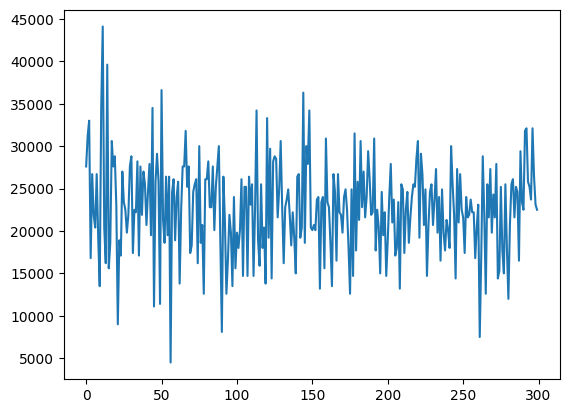


    최소 시간: 1.25시간(4500)
    최대 시간: 12.25시간(44100)
    평균 시간: 6.291944444444445시간(22651.0)


In [5]:
duration_list = list()
for f_name in file_list_py:
    edf = pyedflib.EdfReader(dataset_dir + "/"+  f_name)
    duration_list += [edf.getFileDuration()]
plt.plot(duration_list,label=f_name)
plt.show()
print(
    f'''
    최소 시간: {min(duration_list)/3600}시간({min(duration_list)})
    최대 시간: {max(duration_list)/3600}시간({max(duration_list)})
    평균 시간: {np.mean(duration_list)/3600}시간({np.mean(duration_list)})''')

In [5]:
labels = edf.getSignalLabels()
print(len(labels))
print(labels)

24
['X axis', 'Y axis', 'Z axis', 'ECG', 'Mel_Freq01', 'Mel_Freq02', 'Mel_Freq03', 'Mel_Freq04', 'Mel_Freq05', 'Mel_Freq06', 'Mel_Freq07', 'Mel_Freq08', 'Mel_Freq09', 'Mel_Freq10', 'Mel_Freq11', 'Mel_Freq12', 'Mel_Freq13', 'Mel_Freq14', 'Mel_Freq15', 'Mel_Freq16', 'Mel_Freq17', 'Mel_Freq18', 'Mel_Freq19', 'Mel_Freq20']


In [33]:
dataset_dir + "/"+  file_list_py[80]

'/home/maic-player/dataset/1_Train+Val/OSA_010.edf'

In [34]:
edf = pyedflib.EdfReader(f"{os.getcwd()}/dataset/1_Train+Val/{file_list_py[80]}")

In [35]:
print("Duaration:"+str(edf.getFileDuration()))
print("Freq.:"+str(edf.getSampleFrequencies()))
print("N-Sample(=Freq x Duaration):"+str(edf.getNSamples()))
print("Date:"+str(edf.getStartdatetime()))

Duaration:26100
Freq.:[1000 1000 1000 2500  400  400  400  400  400  400  400  400  400  400
  400  400  400  400  400  400  400  400  400  400]
N-Sample(=Freq x Duaration):[2610000 2610000 2610000 6525000 1044000 1044000 1044000 1044000 1044000
 1044000 1044000 1044000 1044000 1044000 1044000 1044000 1044000 1044000
 1044000 1044000 1044000 1044000 1044000 1044000]
Date:2022-08-27 22:38:27


In [36]:
edf.readSignal(0).size

2610000

1000개 -> 10초간 측정된 데이터

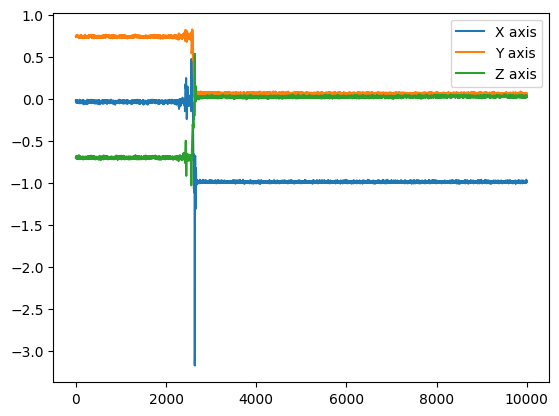

In [37]:
# xyz plot
ten_sec=1000
for i in range(0,3):
    plt.plot(edf.readSignal(i)[10*ten_sec:20*ten_sec],label=labels[i])
plt.legend()
plt.show()

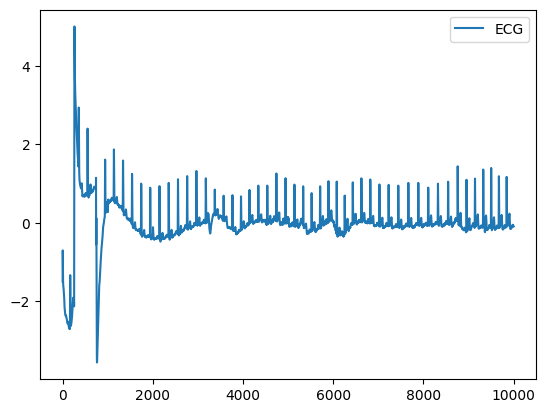

In [38]:
# ECG plot
index = 3
plt.plot(edf.readSignal(index)[10*ten_sec:20*ten_sec], label=labels[index])
plt.legend()
plt.show()

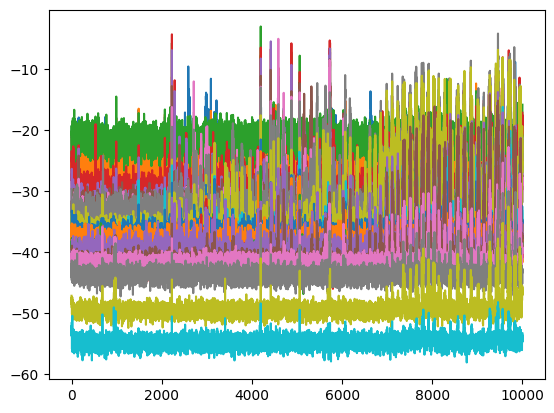

In [16]:
# mel freq plot
for i in range(4,24):
    plt.plot(edf.readSignal(i)[10*ten_sec:20*ten_sec], label=labels[i])
# plt.legend()
plt.show()

In [17]:
print("Anotation:"+str(edf.read_annotation()))
print("Technician:"+str(edf.getTechnician()))
print("Header:"+str(edf.getHeader()))

Anotation:[]
Technician:
Header:{'technician': '', 'recording_additional': '', 'patientname': '', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': '', 'startdate': datetime.datetime(2022, 8, 27, 22, 38, 27), 'birthdate': ''}


In [18]:
print("SIgnal-Header(CH-0):"+str(edf.getSignalHeader(0))+"¥n")

SIgnal-Header(CH-0):{'label': 'X axis', 'dimension': 'g', 'sample_rate': 1000.0, 'sample_frequency': 1000.0, 'physical_max': 8.0, 'physical_min': -8.0, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': 'UNKNOWN', 'transducer': 'UNKNOWN'}¥n


In [19]:
print(edf.file_info())

file name: /home/maic-player/dataset/1_Train+Val/OSA_010.edf
signals in file: 24
None


제출용 코드

!echo -n 유저이메일:유저비밀번호 | curl -v -X POST -T "Test_Answer_Form.csv" https://maic.or.kr/api/direct-report/605?password=aPfnF7TsAuMYdwKd


In [25]:
max_seq = 45000*100
# ndarray maximum => 3456000
test = list()
for i in range(4,24):
    _read = edf.readSignal(i)
    _len = len(_read)
    if _len < max_seq:
        _read = np.append(_read, [0.0]*(max_seq-_len))
    elif _len > max_seq:
        _read = _read[:max_seq]
    test += [_read]

In [26]:
test[0]

array([-22.54184787,   0.        ,  -4.88044556, ...,   0.        ,
         0.        ,   0.        ])

최소 시간: 1.25시간(4500)

최대 시간: 12.25시간(44100)

평균 시간: 6.291944444444445시간(22651.0)

In [ ]:
1044000
1043001
print(torch.backends.cudnn.is_available())
print(torch.backends.cudnn.version())
print(torch.backends.cudnn.enabled)

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
import pyedflib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import sys
import pandas as pd
import pyedflib

max_seq = 45000
default_path = os.getcwd() + "/dataset/1_Train+Val"
file_list_py = os.listdir(default_path)

to_df = [[],[],[]]
for flp in tqdm(file_list_py):
    try:
        edf = pyedflib.EdfReader(f"{default_path}/{flp}")
        # ndarray maximum => 3456000
        test = list()
        for i in range(4,24):
            _read = edf.readSignal(i)[20000:80000]
            _len = len(_read)
            if _len < max_seq:
                _read = np.append(_read, [0.0]*(max_seq-_len))
            elif _len > max_seq:
                _read = _read[:max_seq]
            test += [_read.tolist()]
        del _read
        to_df[0] += [f"{flp}"]
        to_df[1] += [test]
        to_df[2] += [1 if "OSA" in flp else 0]
        del test, edf
    except:
        print("error in process")
        continue

test = pd.DataFrame(
    {
        "name":  to_df[0],
        "data":  to_df[1], 
        "label": to_df[2]
    })

/miniconda/envs/vanila-maic2022/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-21 15:51:55.458302: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
  5%|▍         | 14/301 [00:07<02:21,  2.03it/s]

In [ ]:
print(len(to_df[0]))
print(len(to_df[1]))
print(len(to_df[2]))

In [ ]:
test.to_csv("data.tsv",sep="\t",index=False)

In [ ]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(test,test_size=0.1,random_state=42)
train.to_csv("train.tsv",sep="\t",index=False)
valid.to_csv("valid.tsv",sep="\t",index=False)

In [ ]:
import torch
test_tensor = torch.tensor([test],dtype=torch.float32)
test_tensor.size(), test_tensor.dtype

In [ ]:
device = "cpu"
try: 
    del TestModel
except:
    print("모델 없음")
finally:
    TestModel = Model(device=device)

모델 없음


In [203]:
t = torch.tensor([[1,0], [1,0]])
t[:,1]

tensor([0, 0])

학습 테스트

In [22]:
from torch.utils.data import Dataset
import torch
import os
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
import pyedflib
import numpy as np
import pandas as pd

max_seq = 45000
default_path = os.getcwd() + "/dataset/1_Train+Val"
file_list_py = os.listdir(default_path)
to_df = [[],[],[]]
for flp in tqdm(file_list_py):
    try:
        edf = pyedflib.EdfReader(f"{default_path}/{flp}")
        test = list()
        for i in range(4,24):
            _read = edf.readSignal(i)[20000:80000]
            _len = len(_read)
            if _len < max_seq:
                _read = np.append(_read, [0.0]*(max_seq-_len))
            elif _len > max_seq:
                _read = _read[:max_seq]
            test += [_read.tolist()]
        del _read
        to_df[0] += [f"{flp}"]
        to_df[1] += [test]
        to_df[2] += [1 if "OSA" in flp else 0]
        del test, edf
    except:
        print("error in process")
        continue

df = pd.DataFrame(
    {
        "name":  to_df[0],
        "data":  to_df[1], 
        "label": to_df[2]
    })
Train, Valid = train_test_split(df,test_size=0.1,random_state=42)

class CustomDataset(Dataset):
    def __init__(self, 
                 is_train:bool = True, 
                 device:str = "cpu"):
        self.device = device

        self.dataset = Train if is_train else Valid
        # self.dataset = pd.read_csv("train.tsv" if is_train else "valid.tsv",
        #                            sep="\t", 
        #                            dtype={"name":str, "data": object, "label": int})
        # self.dataset['data'] = self.dataset.apply(lambda x: eval(x['data']), axis=1)

    def __getitem__(self, 
                    index: int):
        example = self.dataset.iloc[index,:]
        data = np.array(example.data, dtype=np.float32)
        label = np.array(example.label, dtype=np.float32)
        return (torch.tensor(data).to(self.device),
                torch.tensor(label).to(self.device))
    
    def __len__(self) -> int:
        return len(self.dataset)

 34%|███▎      | 101/301 [00:56<01:42,  1.96it/s]

error in process


100%|██████████| 301/301 [02:41<00:00,  1.87it/s]


In [11]:
import torch
from torch import nn

class Model(nn.Module):
    def __init__(self, 
                 device="cpu"):
        super().__init__()
        self.device=device
        self.cnn = nn.Conv2d(in_channels=20,
                             out_channels=20,
                             kernel_size=(1,1)).to(self.device)
        self.lstm1 = nn.Conv2d(in_channels=20,
                             out_channels=1,
                             kernel_size=(1,1)).to(self.device)
        self.flatten = nn.Flatten()
        self.lstm2 = nn.LSTM(
                input_size = max_seq,
                hidden_size = 1044,
                bidirectional = True,
                batch_first=True,).to(self.device)
        self.mlp = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(1044*2, 24*24*24*3),
            nn.Linear(24*24*24*3, 24*24*24*3),
            nn.Dropout(p=0.3),
            nn.Linear(24*24*24*3, 24*24),
            nn.Linear(24*24, 24),
            nn.ReLU(),
            nn.Linear(24, 2),
            nn.Sigmoid()            
        ).to(self.device)
    
    def forward(self, 
                inputs,
                labels=None,
                return_dict=False):
        outputs = self.cnn(inputs)[0]
        print(outputs.shape)
        outputs = self.lstm1(outputs)[0]
        print(outputs.shape)
        # outputs = self.flatten(outputs)[0]
        outputs = self.lstm2(outputs)[0] 
        return  self.mlp(outputs)

In [12]:
import json
from typing import List, NamedTuple, Optional, Tuple
from tqdm.auto import tqdm
import os
import torch
import logging
from torch.utils.data import Dataset, DataLoader
import random
from torch.nn import functional as F
from torch.optim import Adam
import numpy as np
import pandas as pd
import time, re, math
from torchmetrics.classification import BinaryF1Score
from torch.optim.lr_scheduler import CosineAnnealingLR
#################################################
################### Variables ###################
#################################################

GPTDecodingInputType = Tuple[torch.Tensor, torch.Tensor]
GPTInputsType = Tuple[torch.Tensor, torch.Tensor, torch.Tensor]
GPTFeaturesType = Tuple[List[int], List[float], List[int], List[int], List[int]]

MAX_QUESTION_SPACE = 32
MIN_QUESTION_SPACE = 5
max_seq = 45000
#######################################################
################### Data Processing ###################
#######################################################


def _create_logger(output_dir: str):
    logger = logging.getLogger()

    if len(logger.handlers)>0:
      return logger

    logger.setLevel(logging.INFO)
    formatter = logging.Formatter("[%(asctime)s] %(message)s")

    file_handler = logging.FileHandler(os.path.join(output_dir, "train.log"))
    file_handler.setFormatter(formatter)
    logger.addHandler(file_handler)

    handler = TqdmLoggingHandler()
    handler.setFormatter(logging.Formatter("%(asctime)s - %(message)s"))
    logger.addHandler(handler)
    return logger        
        
class TqdmLoggingHandler(logging.Handler):
    def __init__(self, level=logging.NOTSET):
        super().__init__(level)

    def emit(self, record):
        try:
            msg = self.format(record)
            tqdm.write(msg)
            self.flush()
        except (KeyboardInterrupt, SystemExit):
            raise
        except Exception:
            self.handleError(record)

class MyConfig(NamedTuple):
    train_dataset: str = "train.tsv"
    dev_dataset: str = "test.tsv"

    epochs: int = 25
    lr: float = 5e-5
    train_batch_size: int = 16
    eval_batch_size: int = 16

    output_dir: str = "/home/maic-player/outputs/"

    grad_clip: float = 1.0
    warmup_ratio: float = 0.1

    train_log_interval: int = 50
    validation_interval: int = 1000
    save_interval: int = 1000
    save_path: Optional[str] = "/home/maic-player/OSA_Classifier.pt"
    
    random_seed: int = 42
    
            
def mle_loss(output, label):
    return torch.nn.functional.nll_loss(
                torch.nn.functional.log_softmax(output.logits,dim=-1)[0], label[0],
                reduction='sum'
            )

##################################################
################### functions ####################
##################################################

def train(config: MyConfig):
    logger = _create_logger(output_dir=config.output_dir)
    logger.info("============================")
    for key, value in config._asdict().items():
        logger.info(f"{key:30}:{value}")
    logger.info("============================")
    torch.manual_seed(config.random_seed)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # model 생성
    model = Model(device=device)
    # model = MODEL
    
    # model.load_state_dict(torch.load("/content/output_dir/gpt2_2021.11.30_02.36.05/gpt2_step_9500.pth"))
    model.to(device)

    logger.info("loading train dataset")
    train_dataset = CustomDataset(is_train=True, device=device)
    train_dataloader = DataLoader(train_dataset, 
                                  config.train_batch_size, 
                                  shuffle=True, 
                                  num_workers=8)
    logger.info("loading dev dataset")
    dev_dataset = CustomDataset(is_train = False, device=device)
    dev_dataloader = DataLoader(dev_dataset,
                                config.eval_batch_size, 
                                shuffle=False,
                                num_workers=8)
    loss_function = torch.nn.BCELoss()
    
    optimizer = Adam(model.parameters(), lr=config.lr)
    total_steps = len(train_dataloader) * config.epochs
    warmup_steps = int(total_steps * config.warmup_ratio)
    metric = BinaryF1Score()
    scheduler = CosineAnnealingLR(optimizer, total_steps, warmup_steps)
    # scheduler = get_linear_schedule_with_warmup(optimizer, warmup_steps, total_steps)
    
    loss_list_between_log_interval = []
    logger.info("=========Start Train========")

    for epoch_id in range(config.epochs):
        for step_index, batch_data in tqdm(
            enumerate(train_dataloader), 
            f"[TRAIN] EP:{epoch_id+1}", 
            total=len(train_dataloader),
            leave=True):
            global_step = len(train_dataloader) * epoch_id + step_index + 1

            input_ids, labels = tuple(value.to(device) for value in batch_data)
            model_outputs = model.forward(inputs=input_ids, 
                                          labels=labels, 
                                          return_dict=True)
            # print(model_outputs)
            # loss = loss_function(model_outputs.encoder_hidden_states.view(-1, MODEL.config.vocab_size),
            #                      labels.view(-1),)
            loss = mle_loss(modle_outputs, labels)
            f1 = metric(model_outputs[:,1]. labels)
            # loss.requires_grad=True
            optimizer.zero_grad()
            # loss += model_outputs.loss
            # model_outputs.loss.backward()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), config.grad_clip)
            optimizer.step()
            scheduler.step()

            # for logging
            loss_list_between_log_interval.append(loss.item())

            if global_step % config.train_log_interval == 0:
                mean_loss = np.mean(loss_list_between_log_interval)
                logger.info(f"EP:{epoch_id} global_step:{global_step} "
                            f"loss:{mean_loss:.4f} "
                            f"f1:{f1:.4f}")
                loss_list_between_log_interval.clear()

            if global_step % config.validation_interval == 0:
                _validate(model, dev_dataloader, device, logger, global_step)

            if global_step % config.save_interval == 0:
                state_dict = model.state_dict()
                model_path = os.path.join(config.output_dir, f"gpt2_step_{global_step}.pth")
                logger.info(f"global_step: {global_step} model saved at {model_path}")
                torch.save(state_dict, model_path)
    state_dict = model.state_dict()
    model_path = os.path.join(config.output_dir, f"exit_save.pth")
    logger.info(f"global_step: {global_step} model saved at {model_path}")
    torch.save(state_dict, model_path)

def _validate(model,
              dev_dataloader: DataLoader,
              device: torch.device,
              logger: logging.Logger,
              global_step: int,):
    model.eval()
    metric = BinaryF1Score()
    loss_list = []
    for batch_data in tqdm(dev_dataloader, desc="[EVAL]", leave=True):
        with torch.no_grad():
            inputs, labels = tuple(value.to(device) for value in batch_data)         
            model_outputs = model.forward(inputs=inputs,
                                          labels=labels, 
                                          return_dict=True)
            loss_list.append(model_outputs.loss.item())

    mean_loss = np.mean(loss_list)
    f1 = metric(model_outputs[:,1]. labels)

    logger.info(f"[EVAL] global_step:{global_step} "
                f"loss:{mean_loss:.4f} "
                f"f1:{f1:.4f}")
    model.train()



In [21]:
torch.cuda.get_device_properties("cuda")

_CudaDeviceProperties(name='NVIDIA RTX A6000', major=8, minor=6, total_memory=48685MB, multi_processor_count=84)

In [13]:
#@title <i>QAQG TRAIN
import gc
import datetime 

gc.collect()


os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

if __name__ == "__main__":
#kwargs = {key: value for key, value in vars(parser.parse_args()).items() if value is not None}
#@markdown #### hyperparameters
#@markdown ---
    batch:int =  64#@param {type:"integer"}{allow-input:true}
    epoch:int =  50#@param {type:"integer"}
    learning_rate:float = 1e-6 #@param {type:"number"}
    train_log_interval:int = 250 #@param {type:"integer"}
    validation_interval:int = 100000 #@param {type:"integer"}
    save_interval:int =  250#@param {type:"integer"}
    random_seed:int = 42 #@param {type:"integer"}
    output = "/home/maic-player" #@param {type:"string"}
#@markdown ---
    kwargs = {"train_batch_size": batch,
              "eval_batch_size":batch, 
              "lr":learning_rate,
              "epochs": epoch, 
              "train_log_interval":train_log_interval,
              "validation_interval":validation_interval,
              "save_interval":save_interval,
              "random_seed":random_seed,
              "output_dir":output}

    timestamp = datetime.datetime.now().strftime("%Y.%m.%d_%H.%M.%S")
    artifacts_dir = os.path.join(kwargs["output_dir"], f"osa_{timestamp}")
    os.makedirs(artifacts_dir, exist_ok=True)
    kwargs["output_dir"] = artifacts_dir

    train(MyConfig(**kwargs))

2022-11-21 16:17:11,685 - ============================
2022-11-21 16:17:11,686 - train_dataset                 :train.tsv
2022-11-21 16:17:11,686 - dev_dataset                   :test.tsv
2022-11-21 16:17:11,686 - epochs                        :50
2022-11-21 16:17:11,686 - lr                            :1e-06
2022-11-21 16:17:11,687 - train_batch_size              :64
2022-11-21 16:17:11,687 - eval_batch_size               :64
2022-11-21 16:17:11,687 - output_dir                    :/home/maic-player/osa_2022.11.21_16.17.11
2022-11-21 16:17:11,687 - grad_clip                     :1.0
2022-11-21 16:17:11,687 - warmup_ratio                  :0.1
2022-11-21 16:17:11,687 - train_log_interval            :250
2022-11-21 16:17:11,687 - validation_interval           :100000
2022-11-21 16:17:11,687 - save_interval                 :250
2022-11-21 16:17:11,687 - save_path                     :/home/maic-player/OSA_Classifier.pt
2022-11-21 16:17:11,687 - random_seed                   :42
2022-11-2

[TRAIN] EP:1:   0%|          | 0/5 [00:00<?, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/miniconda/envs/vanila-maic2022/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/miniconda/envs/vanila-maic2022/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/miniconda/envs/vanila-maic2022/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_6105/3850760229.py", line 60, in __getitem__
    return (torch.tensor(data).to(self.device),
  File "/miniconda/envs/vanila-maic2022/lib/python3.8/site-packages/torch/cuda/__init__.py", line 217, in _lazy_init
    raise RuntimeError(
RuntimeError: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start method


In [ ]:
#@title <b><i>Training 파일 저장<i/></b>
%%writefile kobart_chit_chat.py
import argparse
import logging
import os
import gc

import numpy as np
import pandas as pd
import time

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset


# from torch.optim import AdamW
import pytorch_lightning as pl
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import (TQDMProgressBar,
                                         StochasticWeightAveraging,
                                         DeviceStatsMonitor,
                                         XLAStatsMonitor)
# import torch_xla.core.xla_model as xm
from torchmetrics.text.bleu import BLEUScore


parser = argparse.ArgumentParser(description='KoBART Chit-Chat')

parser.add_argument('--checkpoint_path',
                    type=str,
                    help='checkpoint path')

parser.add_argument('--chat',
                    action='store_true',
                    default=False,
                    help='response generation on given user input')

logger = logging.getLogger()
logger.setLevel(logging.INFO)

scheduler = CosineAnnealingLR(optimizer, total_steps, warmup_steps)


class ArgsBase():
    @staticmethod
    def add_model_specific_args(parent_parser):
        parser = argparse.ArgumentParser(
            parents=[parent_parser], add_help=False)
        parser.add_argument('--train_file',
                            type=str,
                            default='train.tsv',
                            help='train file')

        parser.add_argument('--test_file',
                            type=str,
                            default='valid.tsv',
                            help='test file')

        parser.add_argument('--batch_size',
                            type=int,
                            default=64,
                            help='')

        return parser

class OSADataModule(pl.LightningDataModule):
    def __init__(self,
                 train_file,
                 test_file,
                 tok_vocab,
                 max_seq_len=512,
                 batch_size=64,
                 num_workers=8):
        super().__init__()
        self.batch_size = batch_size #batch_size
        self.max_seq_len = max_seq_len
        self.train_file_path = train_file
        self.test_file_path = test_file
        self.tok_vocab = tok_vocab
        self.num_workers = num_workers
        self.prepare_data_pre_node = True
    @staticmethod
    def add_model_specific_args(parent_parser):
        parser = argparse.ArgumentParser(
            parents=[parent_parser], add_help=False)
        parser.add_argument('--num_workers',
                            type=int,
                            default=8,
                            help='num of worker for dataloader')
        return parser

    # OPTIONAL, called for every GPU/machine (assigning state is OK)
    def setup(self, stage):
        # split dataset
        self.train = CustomDataset(is_train=True,
                                   device=device)
        
        self.test = CustomDataset(is_train=False,
                                  device=device)

    def train_dataloader(self):
        return DataLoader(self.train,
                          batch_size=self.batch_size,
                          num_workers=self.num_workers,
                          pin_memory=True,
                          shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test,
                         batch_size=self.batch_size,
                         num_workers= self.num_workers,
                         pin_memory=True, 
                         shuffle=False)

    def test_dataloader(self):
        return DataLoader(self.test,
                          batch_size=self.batch_size,
                          num_workers= self.num_workers,
                          pin_memory=True,
                          shuffle=False)
        


class Base(pl.LightningModule):
    def __init__(self, hparams, **kwargs) -> None:
        super(Base, self).__init__()
        self.save_hyperparameters(hparams)

    @staticmethod
    def add_model_specific_args(parent_parser):
        # add model specific args
        parser = argparse.ArgumentParser(
            parents=[parent_parser], add_help=False)

        parser.add_argument('--batch-size',
                            type=int,
                            default=32,
                            help='batch size for training (default: 96)')

        parser.add_argument('--lr',
                            type=float,
                            default=5e-7,
                            help='The initial learning rate')

        parser.add_argument('--warmup_ratio',
                            type=float,
                            default=0.1,
                            help='warmup ratio')

        parser.add_argument('--model_path',
                            type=str,
                            default=None,
                            help='kobart model path')
        return parser

    def configure_optimizers(self):
        # Prepare optimizer
        param_optimizer = list(self.model.named_parameters())
        no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in param_optimizer if not any(
                nd in n for nd in no_decay)], 'weight_decay': 0.01},
            {'params': [p for n, p in param_optimizer if any(
                nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
        optimizer = AdamW(optimizer_grouped_parameters,
                          lr = self.hparams.lr,
                          correct_bias=False)
        # optimizer = Adafactor(optimizer_grouped_parameters,
        #                       lr=self.hparams.lr,
        #                       beta1=0.9,
        #                       relative_step=False,
        #                       warmup_init=True,
        #                       weight_decay=0.1,)
        # warm up lr
        num_workers = (self.hparams.gpus if self.hparams.gpus is not None else 1) * (self.hparams.num_nodes if self.hparams.num_nodes is not None else 1)
        data_len = len(self.trainer._data_connector._train_dataloader_source.dataloader().dataset)
        logging.info(f'number of workers {num_workers}, data length {data_len}')
        num_train_steps = int(data_len / (self.hparams.batch_size * num_workers) * self.hparams.max_epochs)
        logging.info(f'num_train_steps : {num_train_steps}')
        num_warmup_steps = int(num_train_steps * self.hparams.warmup_ratio)
        logging.info(f'num_warmup_steps : {num_warmup_steps}')
        # get_cosine_schedule_with_warmup get_cosine_with_hard_restarts_schedule_with_warmup get_constant_schedule_with_warmup
        scheduler = \
            get_cosine_schedule_with_warmup(
            optimizer,
            num_warmup_steps=num_warmup_steps,
            num_training_steps=num_train_steps,
            num_cycles=self.hparams.max_epochs)
        lr_scheduler = {'scheduler': scheduler, 
                        'monitor': 'loss', 
                        'interval': 'step',
                        'frequency': 1}
        return [optimizer], [lr_scheduler]
        # return optimizer

class MyTrainer(Base):
    def __init__(self, hparams, **kwargs):
        super(MyTrainer, self).__init__(hparams, **kwargs)
        self.model = Model()
    
    def mle_loss(self,logits, labels):
        lprobs = F.log_softmax(logits, dim=-1)
        return -F.nll_loss(lprobs.view(-1, self.model.config.vocab_size),
                           labels.view(-1),
                           reduction='sum')

    def _resize_token_embeddings(self):
        tokens = {"additional_special_tokens":["<P01>","<P02>","<P03>","<P04>","<P05>","<P06>","<P07>","<P08>","<P09>"]}
        self.tokenizer.add_special_tokens(tokens)
        self.model.resize_token_embeddings(len(self.tokenizer))

    def forward(self, inputs):
        return self.model(input_ids=inputs['input_ids'],
                            attention_mask=inputs['attention_mask'],
                            decoder_input_ids=inputs['decoder_input_ids'],
                            decoder_attention_mask=inputs['decoder_attention_mask'],
                            labels=inputs['labels'],
                            return_dict=True)
        # output.loss += self.mle_loss(output.logits, inputs['labels'])
        # return output

    def training_step(self, batch, batch_idx):
        gc.collect()
        outs = self(batch)
        self.log('train_loss', outs.loss, prog_bar=True, on_step=True, on_epoch=True)
        self.log('perplexity', torch.exp(outs.loss),prog_bar=True, on_step=True, on_epoch=True)
        gc.collect()
        return outs.loss

    # def training_step_end(self, training_step_outputs):
    #     return training_step_outputs

    # def training_epoch_end(self, training_step_outputs):
    #     return training_step_outputs

    def validation_step(self, batch, batch_idx):
        outs = self(batch)
        # self.log("batch_size", outs["logits"].shape[0], prog_bar=True, on_step=False, on_epoch=True)
        self.log('val_loss', outs['loss'], prog_bar=True, on_step=False, on_epoch=True)
        self.log('perplexity',torch.exp(outs['loss']),prog_bar=True, on_step=False, on_epoch=True)

    # def validation_epoch_end(self, outputs):
    #     bleu = bleu_score(self.predictions, self.targets) 

    def chat(self, text):
        input_ids =  [self.tokenizer.eos_token_id] + self.tokenizer.encode(text) + [self.tokenizer.eos_token_id]
        res_ids = self.model.generate(torch.tensor([input_ids]),
                                      num_beams=10,
                                      top_p=0.8,
                                      top_k=200,
                                      temperature=1,
                                      max_length=60,
                                      min_length=20,
                                      length_penalty=0.65,
                                      do_sample=True,
                                      repetition_penalty=0.83,
                                      no_repeat_ngram_size=3,
                                      encoder_no_repeat_ngram_size=3,
                                      num_return_sequences=5, )   
        a = self.tokenizer.batch_decode(res_ids.tolist())
        for x in a:
            print("생성 문장",x)
        return a[0].replace('<s>', '').replace('</s>', '').replace('<usr>','').replace('<sys>','')


#main만 고쳐서 실행
if __name__ == '__main__':
    parser = Base.add_model_specific_args(parser)
    parser = ArgsBase.add_model_specific_args(parser)
    parser = ChatDataModule.add_model_specific_args(parser)
    parser = pl.Trainer(callbacks=[
                                   EarlyStopping(monitor="val_loss",
                                                 stopping_threshold=1e-4,
                                                 min_delta=0.00,
                                                 patience=1,
                                                 divergence_threshold=9.0),
                                   # TQDMProgressBar(refresh_rate=1),
                                   # StochasticWeightAveraging(),
                                   # DeviceStatsMonitor(),
                                   # XLAStatsMonitor()
                                   ]).add_argparse_args(parser)
    args = parser.parse_args()
    logging.info(args)

    model = KoBARTConditionalGeneration(args)

    dm = ChatDataModule(train_file=args.train_file,
                        test_file=args.test_file,
                        tok_vocab=args.tokenizer_path,
                        batch_size=args.batch_size,
                        max_seq_len=args.max_seq_len,
                        num_workers=args.num_workers)
    checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor='val_loss',
                                                       dirpath=args.default_root_dir,
                                                       filename='best-checkpoint',
                                                       verbose=True,
                                                       save_last=True,
                                                       mode='min',
                                                       save_top_k=1,)
    tb_logger = pl_loggers.TensorBoardLogger(os.path.join(args.default_root_dir,'tb_logs'),
                                             log_graph=False,)
    lr_logger = pl.callbacks.LearningRateMonitor()
    trainer = pl.Trainer.from_argparse_args(args,
                                            logger=tb_logger,
                                            callbacks=[checkpoint_callback, lr_logger])
    trainer.fit(model, dm, )#ckpt_path=args.default_root_dir+"/last.ckpt")
    
    save_path = "/content/drive/MyDrive/Colab Notebooks/data/chatbot/EMO_Model/KoBART_Chat_Model_V1.0.pth"    
    save_hf_repo(model.model.cpu(), model.tokenizer)

    if args.chat:
        model.model.eval()
        # que=[]
        while 1:
            q = input('user > ').strip()
            # if len(que) > 5:
            #   que.pop(0)
            # que.append("<usr>"+q)
            if q == 'quit':
                break
            elif q == 'save':
                save_path = "/content/drive/MyDrive/Colab Notebooks/data/chatbot/EMO_Model/KoBART_Chat_Model_V1.0.pth"
                torch.save(model.model.state_dict(),save_path)
                print(f'kobart-chat model.pth has saved at {save_path}')
            # else:
            #     text=""
            #     for x in que:
            #         text+=x
            # print(text)
            result=model.chat(q)
            # que.append(result)
            print("Simsimi > {}".format(result))
    else:
        # torch.save(model.model.state_dict(),save_path)
        print(f'### torch kobart-chat model.pth has saved at {save_path} ###')